In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [2]:
#load GBM data 
brain = cptac.Gbm()
gene = "EGFR"

In [19]:

def plot_lin_regression(df1,x_axis, y_axis, title, ra_stats = False, show_plot = True, save_plot = "file_name" ):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis]]
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df_gbm_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    if ra_stats:
        print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))
        
    sns.set(style="darkgrid")
    plot = sns.regplot(x=x1, y=y1, data=df1)
    plot.set(xlabel=x_axis, ylabel=y_axis, title=title)
    if show_plot:
        plt.show()
        
    if save_plot != "file_name":
        plt.savefig(save_plot)
    

In [4]:
Ccrcc = cptac.Ccrcc()

In [5]:
 #Step 1 - Create df
df_gbm = brain.get_proteomics()


Slope of regression: -0.1637256664824653
R-squared: 0.4115691431244513
P-value: 5.6518915861054995e-14


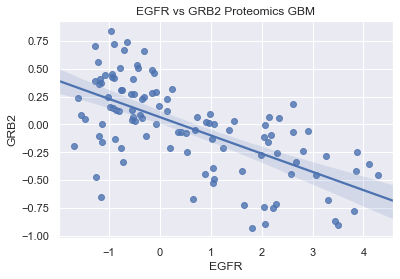

<Figure size 432x288 with 0 Axes>

In [21]:
plot_lin_regression(df_gbm,"EGFR","GRB2","EGFR vs GRB2 Proteomics GBM", ra_stats = True, save_plot = "EGFR_GRB2_GBM")

# Ccrcc

In [11]:
df_Ccrcc = Ccrcc.get_proteomics()
df_Ccrcc.columns = df_Ccrcc.columns.droplevel(1)

df_Ccrcc_subset = df_Ccrcc[["EGFR","GRB2"]]
x1 = df_Ccrcc_subset[["EGFR"]].values
y1 = df_Ccrcc_subset[["GRB2"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.1950107391201895
R-squared: 0.3190044833364907
P-value: 9.660917045267772e-18


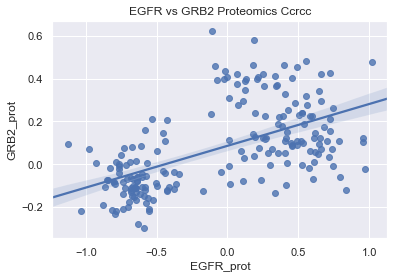

In [12]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df_Ccrcc_subset)
plot.set(xlabel='EGFR_prot', ylabel='GRB2_prot', title='EGFR vs GRB2 Proteomics Ccrcc')
plt.show()

In [13]:

en = cptac.Endometrial()

In [14]:
#format dfs 
df_endo = en.get_proteomics()
df_endo_subset = df_endo[["EGFR","GRB2"]]
df_endo_subset = df_endo_subset.dropna(axis=0, how="any")

x1 = df_endo_subset[["EGFR"]].values
y1 = df_endo_subset[["GRB2"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: -0.25942399931355536
R-squared: 0.19891467379499916
P-value: 2.115854588164119e-08


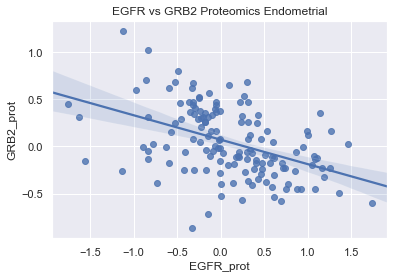

In [15]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df_endo_subset)
plot.set(xlabel='EGFR_prot', ylabel='GRB2_prot', title='EGFR vs GRB2 Proteomics Endometrial')
plt.show()

# 